# Investigating Mobile Phone Feature-Price Interplay Through Advanced Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os, joblib, pickle
from sklearn.svm import SVR


In [2]:
 #Loading Dataset:
data=pd.read_csv("Datasets/Cellphone.csv")

In [3]:
data

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0           203   2357    10   135.0         5.20  424         8     1.350   
1           880   1749    10   125.0         4.00  233         2     1.300   
2            40   1916    10   110.0         4.70  312         4     1.200   
3            99   1315    11   118.5         4.00  233         2     1.300   
4           880   1749    11   125.0         4.00  233         2     1.300   
..          ...    ...   ...     ...          ...  ...       ...       ...   
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem    ram  RearCam  Front_Cam  battery  thickness  
0            16.0  3.000    13.00        8.0     2610        7.4  
1             4.0  1.000     3.15        0.0     1700        9.9  
2             8.0  1.500    13.00        5.0     2000        7.6  
3             4.0  0.512     3.15        0.0     1400       11.0  
4             4.0  1.000     3.15        0.0     1700        9.9  
..            ...    ...      ...        ...      ...        ...  
156         128.0  6.000    12.00       16.0     4080        8.4  
157         128.0  6.000    20.00        8.0     3400        7.9  
158          64.0  4.000    20.00       20.0     3000        6.8  
159         128.0  6.000    20.00        8.0     3400        7.9  
160          16.0  3.000    21.50       16.0     2700        8.4  

[161 rows x 14 columns]

In [4]:
data.shape # Number of rows and columns

(161, 14)

In [5]:
data.describe() #statistical Analysis

Product_id        Price         Sale      weight  resoloution  \
count   161.000000   161.000000   161.000000  161.000000   161.000000   
mean    675.559006  2215.596273   621.465839  170.426087     5.209938   
std     410.851583   768.187171  1546.618517   92.888612     1.509953   
min      10.000000   614.000000    10.000000   66.000000     1.400000   
25%     237.000000  1734.000000    37.000000  134.100000     4.800000   
50%     774.000000  2258.000000   106.000000  153.000000     5.150000   
75%    1026.000000  2744.000000   382.000000  170.000000     5.500000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.200000   

              ppi    cpu core    cpu freq  internal mem         ram  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean   335.055901    4.857143    1.502832     24.501714    2.204994   
std    134.826659    2.444016    0.599783     28.804773    1.609831   
min    121.000000    0.000000    0.000000      0.000000    0.000000   
25%    233.000000    4.000000    1.200000      8.000000    1.000000   
50%    294.000000    4.000000    1.400000     16.000000    2.000000   
75%    428.000000    8.000000    1.875000     32.000000    3.000000   
max    806.000000    8.000000    2.700000    128.000000    6.000000   

          RearCam   Front_Cam      battery   thickness  
count  161.000000  161.000000   161.000000  161.000000  
mean    10.378261    4.503106  2842.111801    8.921739  
std      6.181585    4.342053  1366.990838    2.192564  
min      0.000000    0.000000   800.000000    5.100000  
25%      5.000000    0.000000  2040.000000    7.600000  
50%     12.000000    5.000000  2800.000000    8.400000  
75%     16.000000    8.000000  3240.000000    9.800000  
max     23.000000   20.000000  9500.000000   18.500000

In [6]:
#Data Cleansing:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


All of the features of this dataset belongs to either "Int" or "Float" Type. There are No Null values in this dataset.

# Data Visualization
We will be using Scatter plots. They will observe the relationship between variables and uses dots to represent the connection between them.

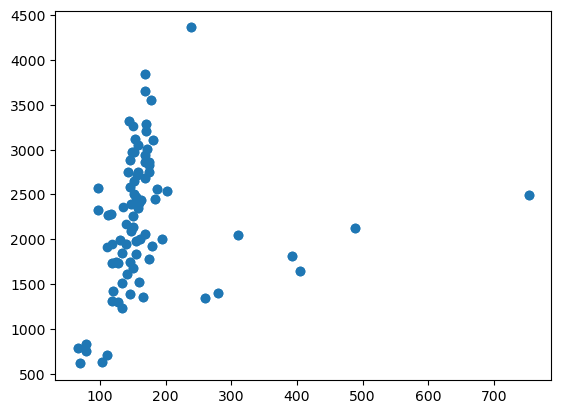

In [7]:
plt.scatter(data["weight"], data["Price"])

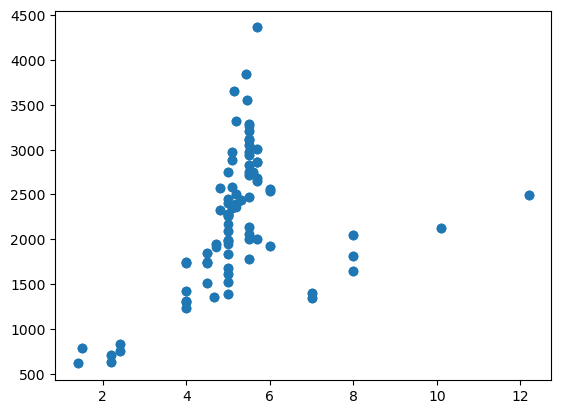

In [8]:
plt.scatter(data["resoloution"], data["Price"])

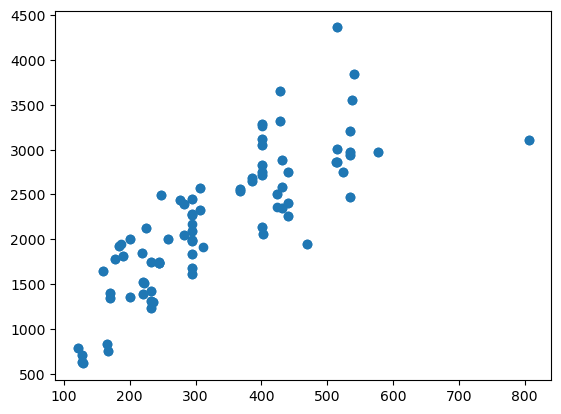

In [9]:
plt.scatter(data["ppi"], data["Price"])

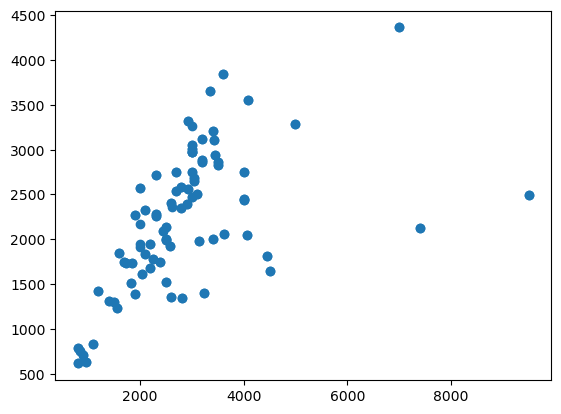

In [10]:
plt.scatter(data["battery"], data["Price"])

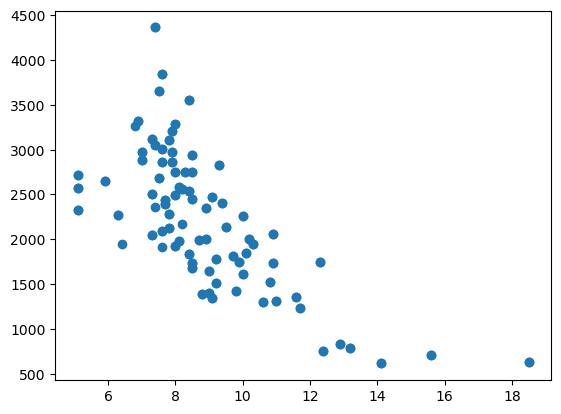

In [11]:
plt.scatter(data["thickness"], data["Price"])

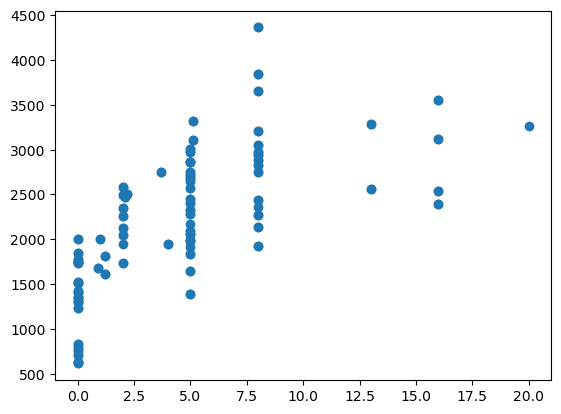

In [12]:
plt.scatter(data["Front_Cam"], data["Price"])

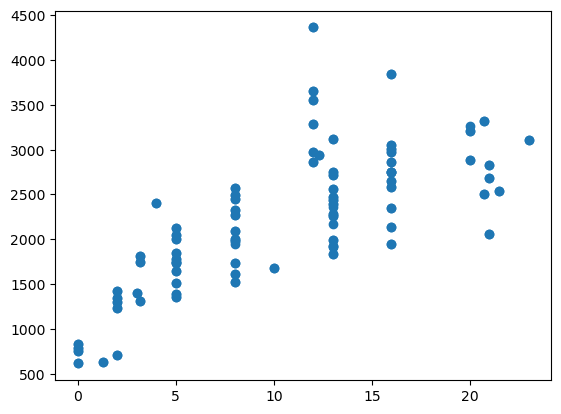

In [13]:
plt.scatter(data["RearCam"], data["Price"])

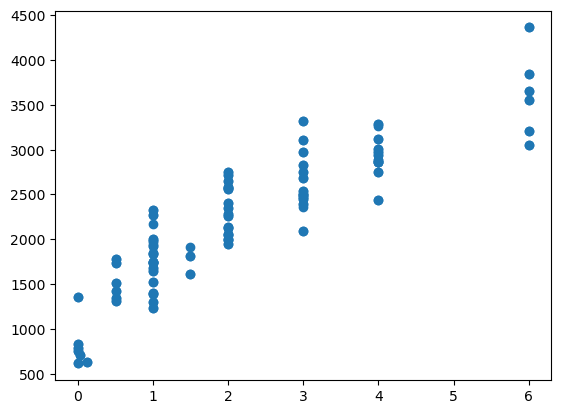

In [14]:
plt.scatter(data["ram"], data["Price"])

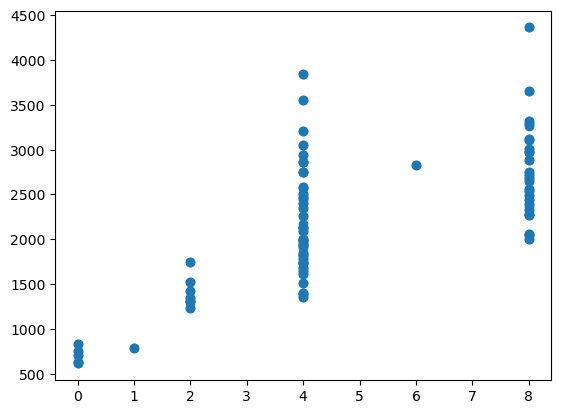

In [15]:
plt.scatter(data["cpu core"], data["Price"])

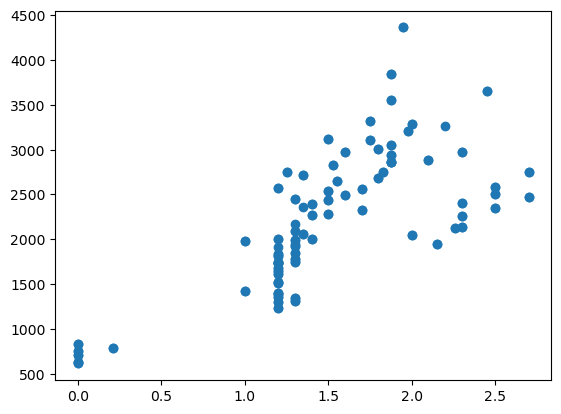

In [16]:
plt.scatter(data["cpu freq"], data["Price"])

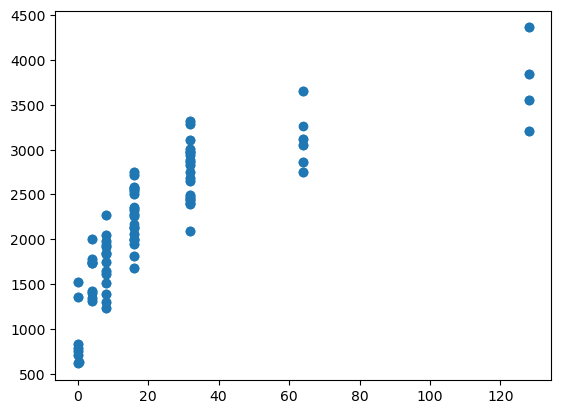

In [17]:
plt.scatter(data["internal mem"], data["Price"])

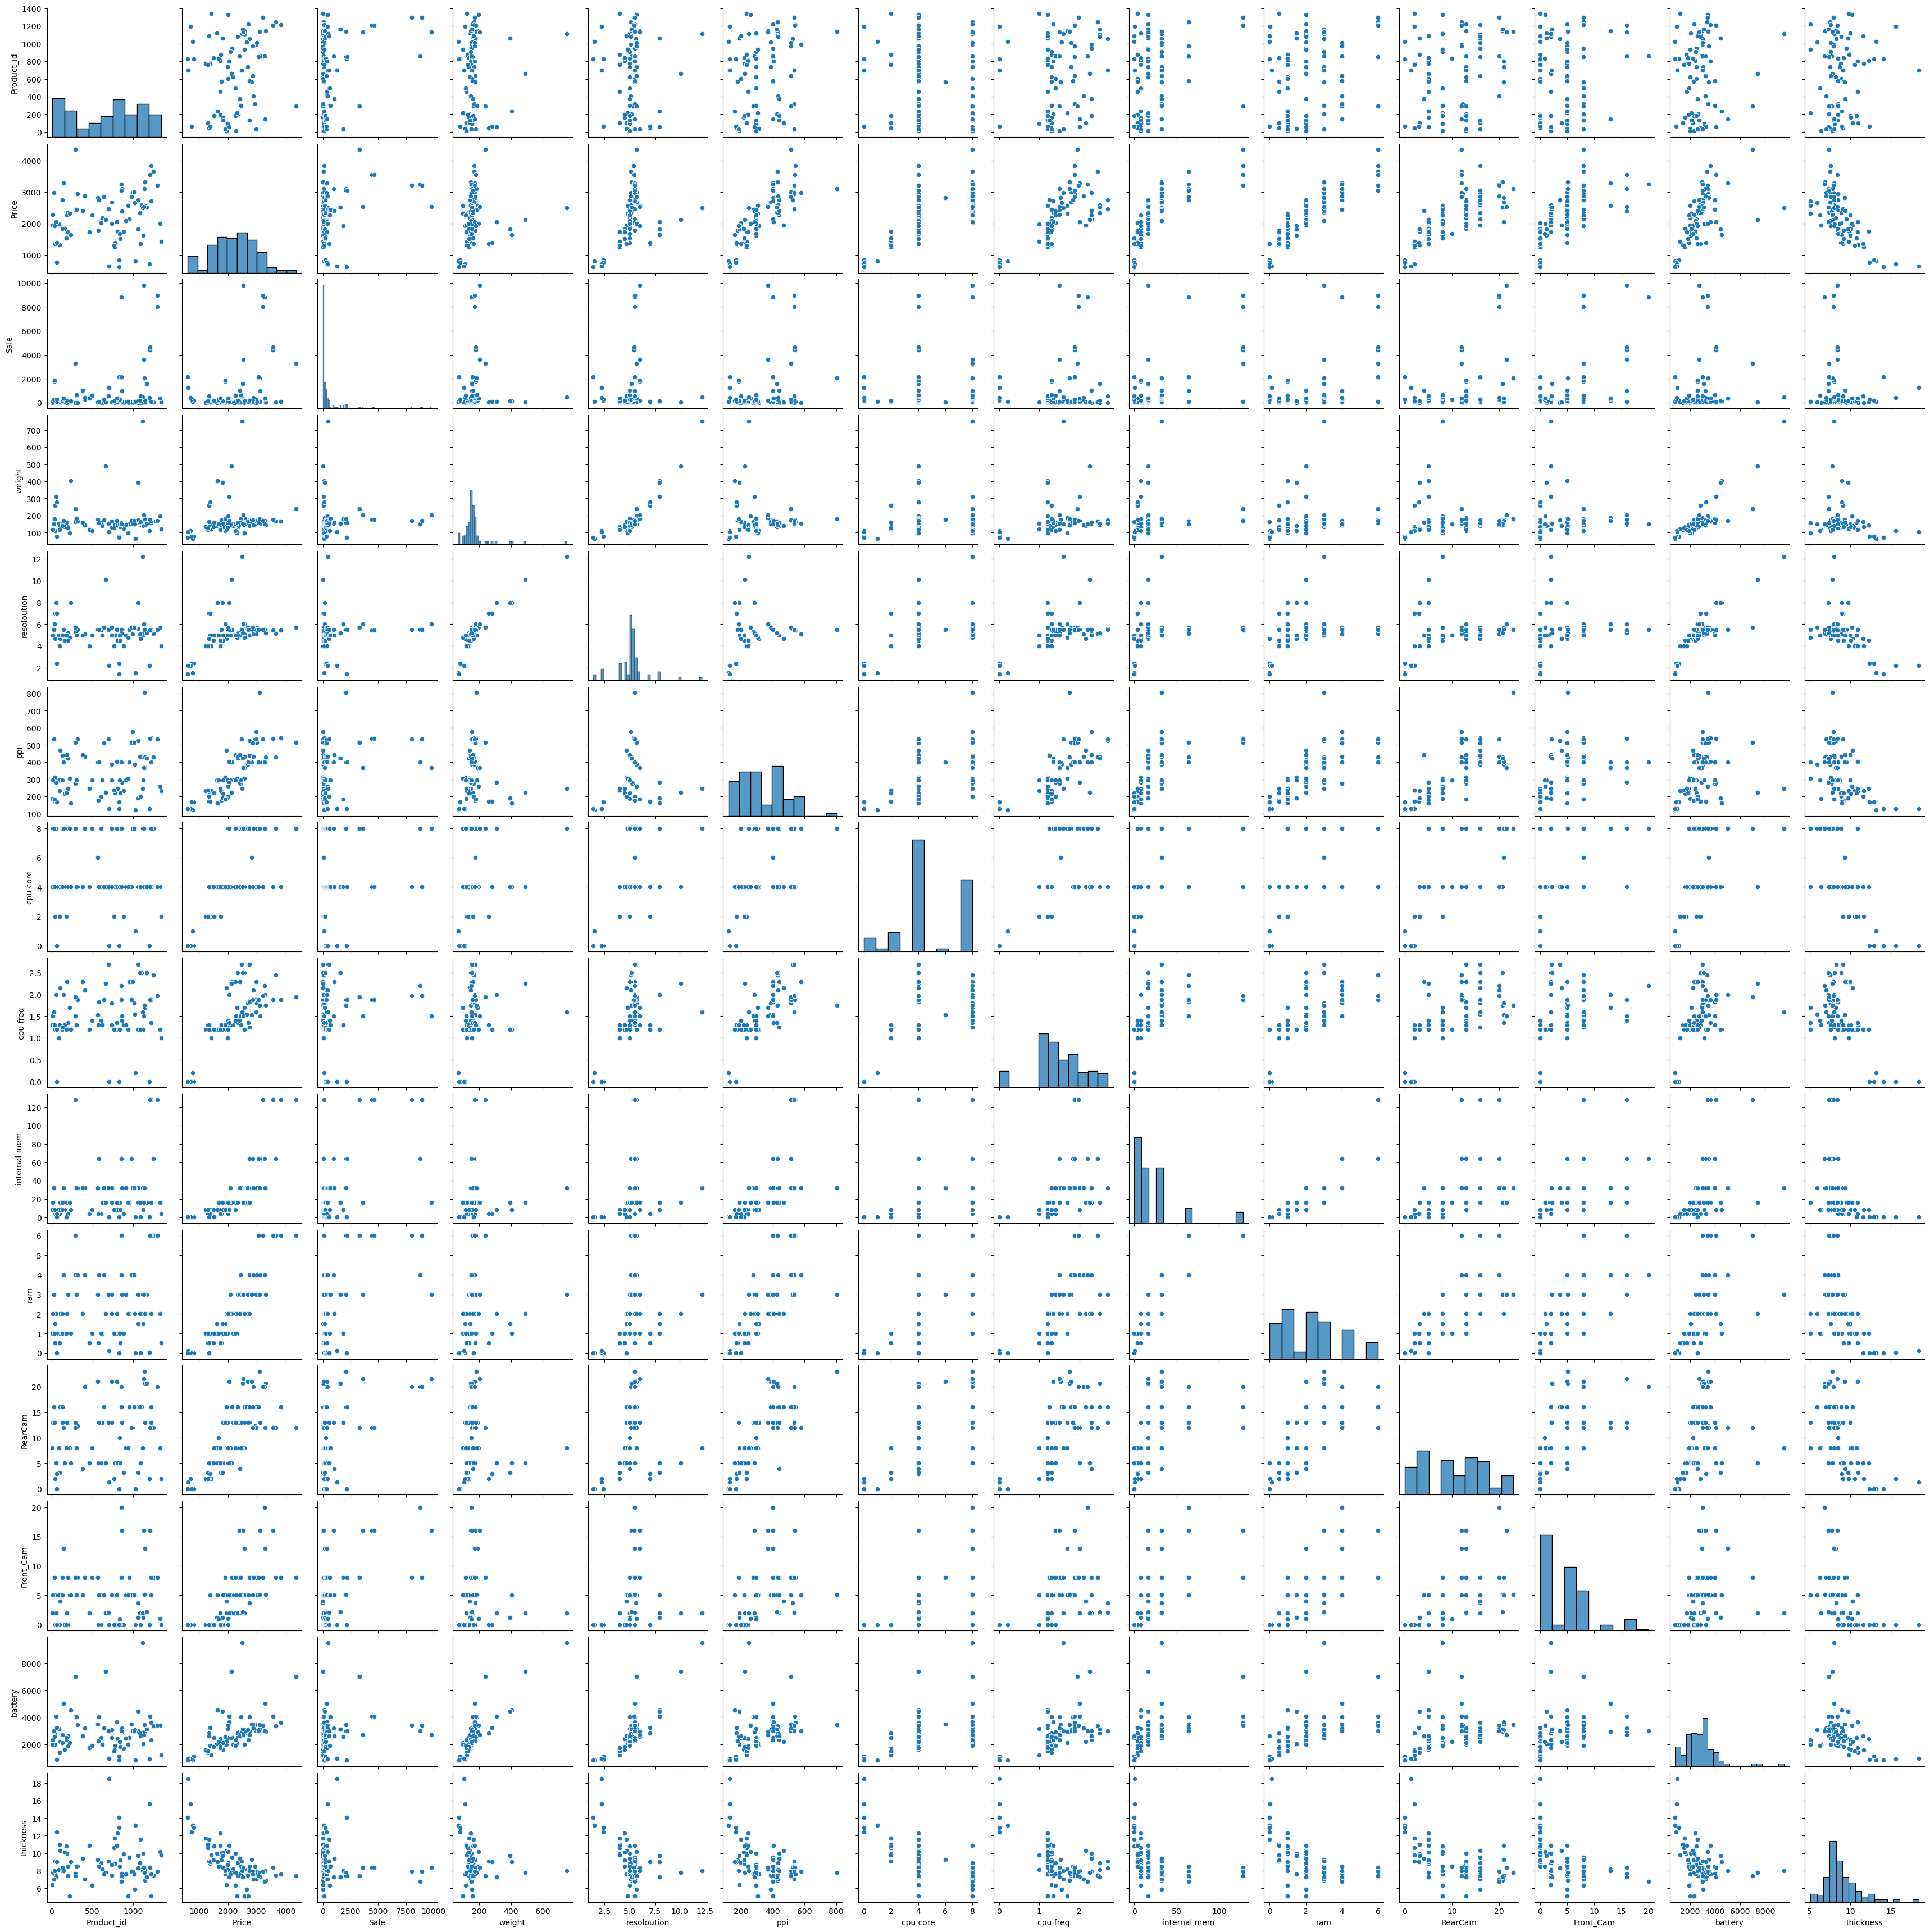

In [18]:
sns.pairplot(data)

The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown above

From the visulizations,we can deduce that almost all the features have a linear relationship

# Checking correlation between features

In [19]:
data=data.drop(columns=["Product_id","Sale"]) #Dropping unwanted columns as they don't add any value to our analysis
corr=data.corr()
import plotly.express as px
fig = px.imshow(corr, text_auto=True,width=1000, height=1000)
fig.show()

# Split datset into X and Y variables

In [20]:
x=data.drop('Price',axis=1)
y=data['Price']

In [21]:
x

weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  \
0     135.0         5.20  424         8     1.350          16.0  3.000   
1     125.0         4.00  233         2     1.300           4.0  1.000   
2     110.0         4.70  312         4     1.200           8.0  1.500   
3     118.5         4.00  233         2     1.300           4.0  0.512   
4     125.0         4.00  233         2     1.300           4.0  1.000   
..      ...          ...  ...       ...       ...           ...    ...   
156   178.0         5.46  538         4     1.875         128.0  6.000   
157   170.0         5.50  534         4     1.975         128.0  6.000   
158   150.0         5.50  401         8     2.200          64.0  4.000   
159   170.0         5.50  534         4     1.975         128.0  6.000   
160   202.0         6.00  367         8     1.500          16.0  3.000   

     RearCam  Front_Cam  battery  thickness  
0      13.00        8.0     2610        7.4  
1       3.15        0.0     1700        9.9  
2      13.00        5.0     2000        7.6  
3       3.15        0.0     1400       11.0  
4       3.15        0.0     1700        9.9  
..       ...        ...      ...        ...  
156    12.00       16.0     4080        8.4  
157    20.00        8.0     3400        7.9  
158    20.00       20.0     3000        6.8  
159    20.00        8.0     3400        7.9  
160    21.50       16.0     2700        8.4  

[161 rows x 11 columns]

In [22]:
x.shape

(161, 11)

In [23]:
y.shape

(161,)

# Perform 80/20 Data split
Since I have already imported train test split, we can split the data into 80:20. Most commonly the ratio used to split the data is 80:20. This is done so that we or our model don't see a particular set of data and is kept aside for testing our trained model. And the larger set is always used for training and the latter for testing.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Checking data dimensions

In [25]:
# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (128, 11)
X_test shape: (33, 11)
y_train shape: (128,)
y_test shape: (33,)


In [26]:
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

def calculateMetrics(algorithm,predict, testY):
    
        # Regression metrics
        mae = mean_absolute_error(testY, predict)
        mse = mean_squared_error(testY, predict)
        rmse = np.sqrt(mse)
        r2 = r2_score(testY, predict)
        
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        print(f"{algorithm} Mean Absolute Error (MAE): {mae:.2f}")
        print(f"{algorithm} Mean Squared Error (MSE): {mse:.2f}")
        print(f"{algorithm} Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"{algorithm} R-squared (R²): {r2:.2f}")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=testY, y=predict, alpha=0.6)
        plt.plot([min(testY), max(testY)], [min(testY), max(testY)], 'r--', lw=2)  # Line of equality
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(algorithm)
        plt.grid(True)
        plt.show()

# Linear Regression Model

Model loaded successfully.
Linear Regresson Mean Absolute Error (MAE): 101.28
Linear Regresson Mean Squared Error (MSE): 17643.67
Linear Regresson Root Mean Squared Error (RMSE): 132.83
Linear Regresson R-squared (R²): 0.96


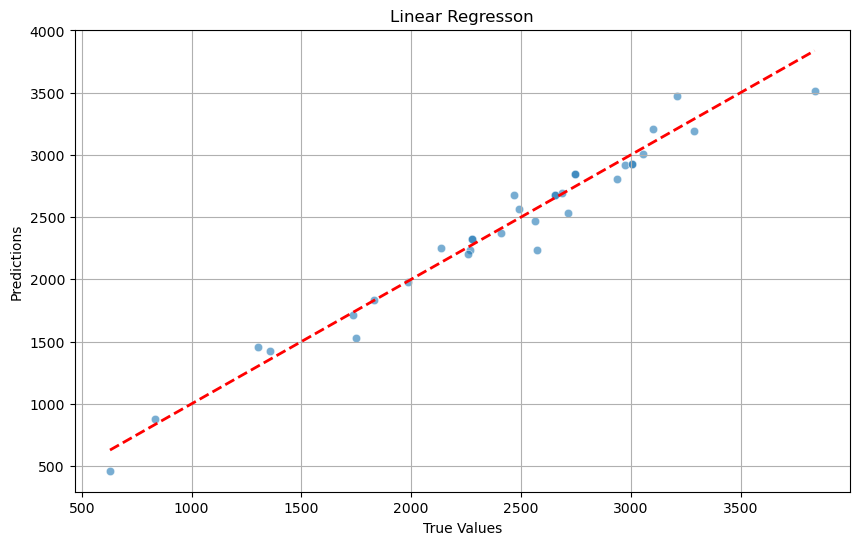

In [27]:
if os.path.exists('model/Linear.pkl'):
    Linear = joblib.load('model/Linear.pkl')
    print("Model loaded successfully.")
    predict = Linear.predict(X_test)
    calculateMetrics("Linear Regresson", predict, y_test)
else:
    Linear = LinearRegression()
    Linear.fit(X_train, y_train)
    joblib.dump(Linear, 'model/Linear.pkl')
    print("Model saved successfully.")
    predict = Linear.predict(X_test)
    calculateMetrics("Linear Regresson", predict, y_test)

Model loaded successfully.
Support Vector Regression Mean Absolute Error (MAE): 559.04
Support Vector Regression Mean Squared Error (MSE): 489788.46
Support Vector Regression Root Mean Squared Error (RMSE): 699.85
Support Vector Regression R-squared (R²): -0.02


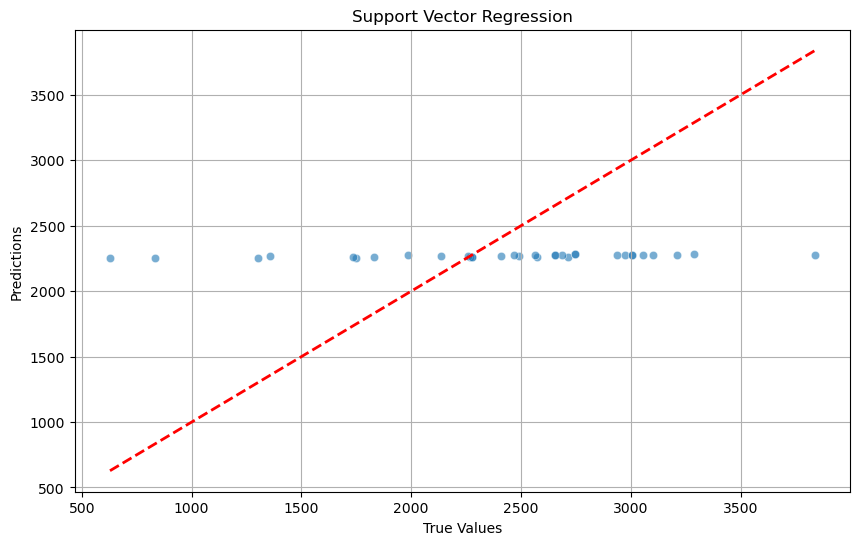

In [28]:
if os.path.exists('model/SVR.pkl'):
    svr_model = joblib.load('model/SVR.pkl')
    print("Model loaded successfully.")
else:
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    joblib.dump(svr_model, 'model/SVR.pkl')
    print("Model saved successfully.")

# Make predictions
predict = svr_model.predict(X_test)

# Calculate metrics
calculateMetrics("Support Vector Regression", predict, y_test)

# Model Prediction on Test Data

In [29]:
test = pd.read_csv('Datasets/test.csv')
test

weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  \
0    169.0          5.5  403         8     1.350            16  2.000   
1    139.2          4.7  469         4     2.150            16  2.000   
2    753.0         12.2  247         8     1.600            32  3.000   
3    404.0          8.0  160         4     1.200             8  1.000   
4    170.0          5.5  534         4     1.975           128  6.000   
5    753.0         12.2  247         8     1.600            32  3.000   
6    180.0          5.5  806         8     1.750            32  3.000   
7    170.0          5.5  401         8     2.000            32  4.000   
8    140.0          5.0  294         4     1.300            16  1.000   
9    174.0          5.6  524         4     2.700            32  3.000   
10   131.0          5.0  294         4     1.300            16  2.000   
11    66.0          1.5  121         1     0.208             0  0.004   

    RearCam  Front_Cam  battery  thickness  
0        21        5.0     3630       10.9  
1        16        4.0     2200       10.3  
2         8        2.0     9500        8.0  
3         5        5.0     4500        9.0  
4        20        8.0     3400        7.9  
5         8        2.0     9500        8.0  
6        23        5.1     3430        7.8  
7        12       13.0     5000        8.0  
8        13        5.0     2000        8.2  
9        16        3.7     3000        8.3  
10       13        5.0     2500        8.7  
11        0        0.0      800       13.2

In [30]:
testdata = test#.drop('Product_id', axis = 1)
testdata

#weight	resoloution	ppi	cpu core	cpu freq	internal mem	ram	RearCam	Front_Cam	battery	thickness

weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  \
0    169.0          5.5  403         8     1.350            16  2.000   
1    139.2          4.7  469         4     2.150            16  2.000   
2    753.0         12.2  247         8     1.600            32  3.000   
3    404.0          8.0  160         4     1.200             8  1.000   
4    170.0          5.5  534         4     1.975           128  6.000   
5    753.0         12.2  247         8     1.600            32  3.000   
6    180.0          5.5  806         8     1.750            32  3.000   
7    170.0          5.5  401         8     2.000            32  4.000   
8    140.0          5.0  294         4     1.300            16  1.000   
9    174.0          5.6  524         4     2.700            32  3.000   
10   131.0          5.0  294         4     1.300            16  2.000   
11    66.0          1.5  121         1     0.208             0  0.004   

    RearCam  Front_Cam  battery  thickness  
0        21        5.0     3630       10.9  
1        16        4.0     2200       10.3  
2         8        2.0     9500        8.0  
3         5        5.0     4500        9.0  
4        20        8.0     3400        7.9  
5         8        2.0     9500        8.0  
6        23        5.1     3430        7.8  
7        12       13.0     5000        8.0  
8        13        5.0     2000        8.2  
9        16        3.7     3000        8.3  
10       13        5.0     2500        8.7  
11        0        0.0      800       13.2

In [31]:
predication  = Linear.predict(testdata)
predication

array([2361.42370419, 2226.15728426, 2566.7157176 , 1629.14352848,
       3470.99595913, 2566.7157176 , 3210.96562699, 3187.90071368,
       1894.87688637, 2707.96682302, 2046.28904262,  901.59546758])

In [32]:
test['Predicted Price'] =  predication
test

weight  resoloution  ppi  cpu core  cpu freq  internal mem    ram  \
0    169.0          5.5  403         8     1.350            16  2.000   
1    139.2          4.7  469         4     2.150            16  2.000   
2    753.0         12.2  247         8     1.600            32  3.000   
3    404.0          8.0  160         4     1.200             8  1.000   
4    170.0          5.5  534         4     1.975           128  6.000   
5    753.0         12.2  247         8     1.600            32  3.000   
6    180.0          5.5  806         8     1.750            32  3.000   
7    170.0          5.5  401         8     2.000            32  4.000   
8    140.0          5.0  294         4     1.300            16  1.000   
9    174.0          5.6  524         4     2.700            32  3.000   
10   131.0          5.0  294         4     1.300            16  2.000   
11    66.0          1.5  121         1     0.208             0  0.004   

    RearCam  Front_Cam  battery  thickness  Predicted Price  
0        21        5.0     3630       10.9      2361.423704  
1        16        4.0     2200       10.3      2226.157284  
2         8        2.0     9500        8.0      2566.715718  
3         5        5.0     4500        9.0      1629.143528  
4        20        8.0     3400        7.9      3470.995959  
5         8        2.0     9500        8.0      2566.715718  
6        23        5.1     3430        7.8      3210.965627  
7        12       13.0     5000        8.0      3187.900714  
8        13        5.0     2000        8.2      1894.876886  
9        16        3.7     3000        8.3      2707.966823  
10       13        5.0     2500        8.7      2046.289043  
11        0        0.0      800       13.2       901.595468